<a href="https://colab.research.google.com/github/hasanzeynal/TensorFlow-Developer-Certificate/blob/main/02_Neural_Network_Classification_in_TensorFlow%20/neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

## What we are gonna cover:
* The architecture of NN Classification Model
* Input Shapes and Output Shapes of NN Classification Model
* Creating Custom Data to view and fit
* Steps in modelling
  * Creating model, compile the model, fit the model, evaluate the model
* Different Classification Evaluation Methods
* Saving and Loading Models

# Creating Data to view and fit

In [2]:
#import make circles
from sklearn.datasets import make_circles

#create circles
X,y = make_circles(n_samples= 1000,
                   noise= 0.03,
                   random_state= 42)   #if you wanna work on classification problem,you can create your data with make_circles

In [3]:
#Check out the labels
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [4]:
import pandas as pd
pd.DataFrame(y).value_counts()   #it create 0 and 1's in the same numbers for the labels

0    500
1    500
dtype: int64

In [5]:
#let's change our x and y to the dataframe to visulise our data
circles = pd.DataFrame({'X_1':X[:,0], 'X_2':X[:,1], 'y':y})
circles

,X_1,X_2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


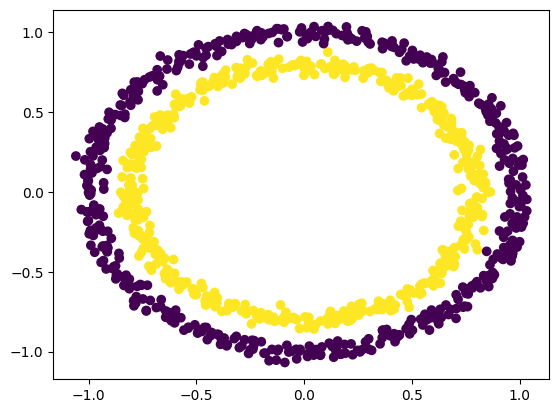

In [6]:
#import matplotlib
import matplotlib.pyplot as plt
#visualise the datas
plt.scatter(X[:,0], X[:,1],c= y)
#show the plot
plt.show()

# Input and Output Shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

# Modelling
We are gonna create some models until we make around 95+ accuracy score

In [8]:
#train test splitting
X_train = X[:800]
X_test = X[800:]

y_train = X[:800]
y_test = X[800:]

#looking for shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800, 2), (200, 2), (200, 2))

##Model 1

In [9]:
#creating model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss= 'mae',optimizer= 'sgd',metrics=['accuracy'])

#fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 5s 3ms/step - loss: 0.9295 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1920 - 

In [10]:
#get the predictions
predictions_1 = model_1.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [11]:
model_1.evaluate(y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

## Model 2

In [12]:
#create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),   #1 hidden layer added
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss='mae', optimizer= 'adam', metrics= ['accuracy'])

#fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=20) #number of epochs is increased to the 20

Epoch 1/20
25/25 [==============================] - 2s 5ms/step - loss: 0.4217 - accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1723 - accuracy: 0.0000e+00
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0723 - accuracy: 0.0000e+00
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.0000e+00
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0488 - accuracy: 0.0000e+00
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.0000e+00
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 0.0000e+00
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.0000e+00
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0038 - 

In [13]:
#get the predictions
predictions_2 = model_2.predict(X_test)

#evaluate the model
model_2.evaluate(predictions_2)

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

## Model 3

In [14]:
#create the third model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),   # 1 hidden layer is added
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),   #loss is changed because our problem is binary classification
                optimizer= 'sgd',
                metrics= ['accuracy'])

#fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs= 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: -3.8639 - accuracy: 0.0000e+00
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1391 - accuracy: 0.0000e+00
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1684 - accuracy: 0.0000e+00
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1825 - accuracy: 0.0000e+00
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1879 - accuracy: 0.0000e+00
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: -4.1906 - accuracy: 0.0000e+00
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1917 - accuracy: 0.0000e+00
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1933 - accuracy: 0.0000e+00
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: -4.1943 - accuracy: 0.0000e+00
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 

##Model 4

In [15]:


#create the model_4
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),  #number of hidden layers is increased
    tf.keras.layers.Dense(1, activation= 'softmax')  #activation function(Sigmoid) for output layer to get 1 answer instead of predictions
])

#compile the model
model_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr= 0.001),   #optimizer is chnaged to the Adam with learning rate of 0.001
                metrics = tf.keras.metrics.Accuracy())

#fit the model
model_4.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs= 100)  #number of epochs is increased about 100 to learn better

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 10/100
25/25 [==============================] - 0s 3ms/ste

## Model 5

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.9802 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5544 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1906 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 2.7584 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3099 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4369 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8891 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8701 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.4660
Epoch 11/

## Model 6

In [17]:
tf.random.set_seed(42)


model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),  #number of hidden layers is increased
    tf.keras.layers.Dense(1, activation= 'softmax')  #activation function(Sigmoid) for output layer to get 1 answer instead of predictions
])

#compile the model
model_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr= 0.001),   #optimizer is chnaged to the Adam with learning rate of 0.001
                metrics = tf.keras.metrics.Accuracy())

#fit the model
model_6.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs= 100)

Epoch 1/100
25/25 [==============================] - 3s 4ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 15.2931 - accuracy: 0.0000e+00
Epoch 10/100
25/25 [==============================] - 0s 3ms/ste

## If you have similar problem,
which is you have 0 accuracy, There can be few issues with your model, Check and fix

* Check your batch_size if it's too large or too small
* Check if the learning rate is too high or low
* if it's text dataset, check the length of sentences, if too large then trim with an average length
* Check if there are NaN values in your dataset, fix it
* Check if the dataset doesn't contain special symbols or characters
* If values are continuous, Normalize it before sending to the network ( check batch normalization )
* Try regularization techniques
* Check the activation functions
* Shuffle the data

In [18]:
#actually, i have checked all of them already instead of on,let's get shuffled our data
shuffled_circles = circles.sample(frac= 1)

#get the depenetend and independent variables
X = shuffled_circles.drop('y',axis=1)
y = shuffled_circles['y']

#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 1)

## Model 7

In [23]:
#Create the model 5
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'softmax')
])

#compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= 'adam',
                metrics= ['accuracy'])

#fit the kodel
model_7.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 7.6437 - accuracy: 0.4988


In [24]:
predictions_7 = model_5.predict(X_test)
model_7.evaluate(predictions_7)

7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

##Model 8

In [47]:
#Create the model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

#compile the model
model_8.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics= ['accuracy'])

#fit the kodel
history_8 = model_8.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.7260
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.8920
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.9890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.9660
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.9920
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2690 - accuracy: 0.9980
Epoch 11/

In [26]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9990


[0.004242944996803999, 0.9990000128746033]

In [32]:
predictions = round(pd.DataFrame(model_8.predict(X_test)),1)
predictions

7/7 [==============================] - 0s 2ms/step


,0
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
195,0.0
196,0.0
197,0.0
198,0.0


In [40]:
predictions[0] = predictions[0].astype('int64')
predictions[0]

0      1
1      0
2      0
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    1
Name: 0, Length: 200, dtype: int64

In [41]:
#accuracy score
accuracy_score(y_test,predictions[0])

0.99

In [46]:
#confusion matrix
confusion_matrix(y_test,predictions[0])

array([[99,  0],
       [ 2, 99]])

<Figure size 1600x900 with 0 Axes>

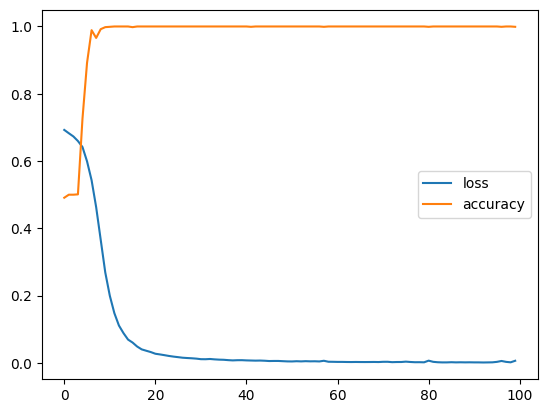

In [51]:
#making plot to visualize loss and accuracy
plt.figure(figsize=(16,9))
pd.DataFrame(history_8.history).plot()
plt.show()

## Model 9
Let's create a model with train and test sets

In [52]:
#let's see how many data points we have
len(X),len(y)

(1000, 1000)

In [55]:
#splitting into train and test sets
X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [89]:
#recreate a model with training datasets and then evaluate it on the test sets

#setting random seed
tf.random.set_seed(42)

#create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

#compile the model
model_9.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),metrics= ['accuracy'])

#fit the model
history_9 = model_9.fit(X_train,y_train, epochs= 100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6993 - accuracy: 0.4462
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5188
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5738
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6725
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.7287
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.7950
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7775
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.8150
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.8612
Epoch 11/

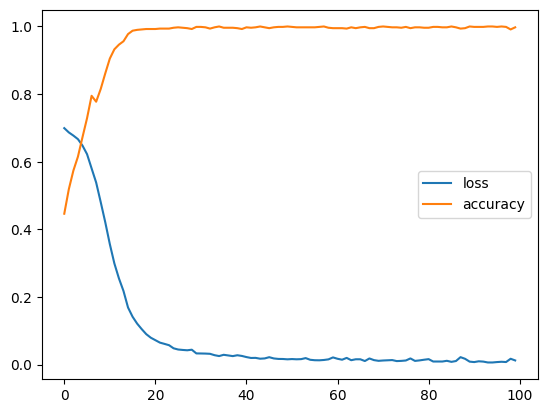

In [90]:
#plotting accuracy and loss
pd.DataFrame(history_9.history).plot()
plt.show()

In [97]:
#get the predictions
predictions_9 = model_9.predict(X_test)
round(pd.DataFrame(predictions_9),0)[0].astype('int64')

7/7 [==============================] - 0s 4ms/step


0      1
1      1
2      1
3      1
4      0
      ..
195    1
196    0
197    1
198    0
199    0
Name: 0, Length: 200, dtype: int64

In [98]:
#confusion matrix
confusion_matrix(y_test,round(pd.DataFrame(predictions_9),0)[0].astype('int64'))

array([[106,   0],
       [  0,  94]])

# Using Callbacks to find model's ideal learning rate
To find ideal learning rate during fitting, we are gonna use this steps:
* A learning rate **callback**.You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [107]:
#let's create a model_10 with the callback(LearningRateScheduler)

#set the random seed
tf.random.set_seed(42)

#create the model(can be same model_9 or similar)
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

#compile the model
model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = 'adam',
                 metrics = ['accuracy'])

#set the callback(LearningRateScheduler) to find ideal Learning Rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10 **(epoch/20))

#fit the model
history_10 = model_10.fit(X_train,
             y_train,
             epochs= 100,
             callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6985 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5213 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

In [111]:
pd.DataFrame(history_10.history)

,loss,accuracy,lr
0,0.698455,0.50625,0.000100
1,0.695898,0.51000,0.000112
2,0.693784,0.52125,0.000126
3,0.692144,0.49125,0.000141
4,0.690745,0.49500,0.000158
...,...,...,...
95,0.784953,0.49500,5.623413
96,0.740355,0.50500,6.309574
97,0.859238,0.49250,7.079458
98,0.718250,0.49250,7.943282


<Axes: >

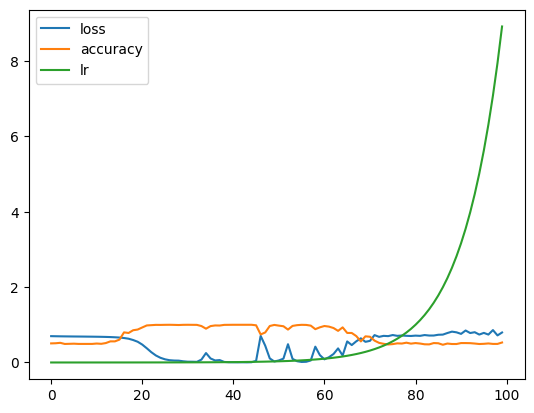

In [108]:
#checkout the history of model_10
pd.DataFrame(history_10.history).plot()

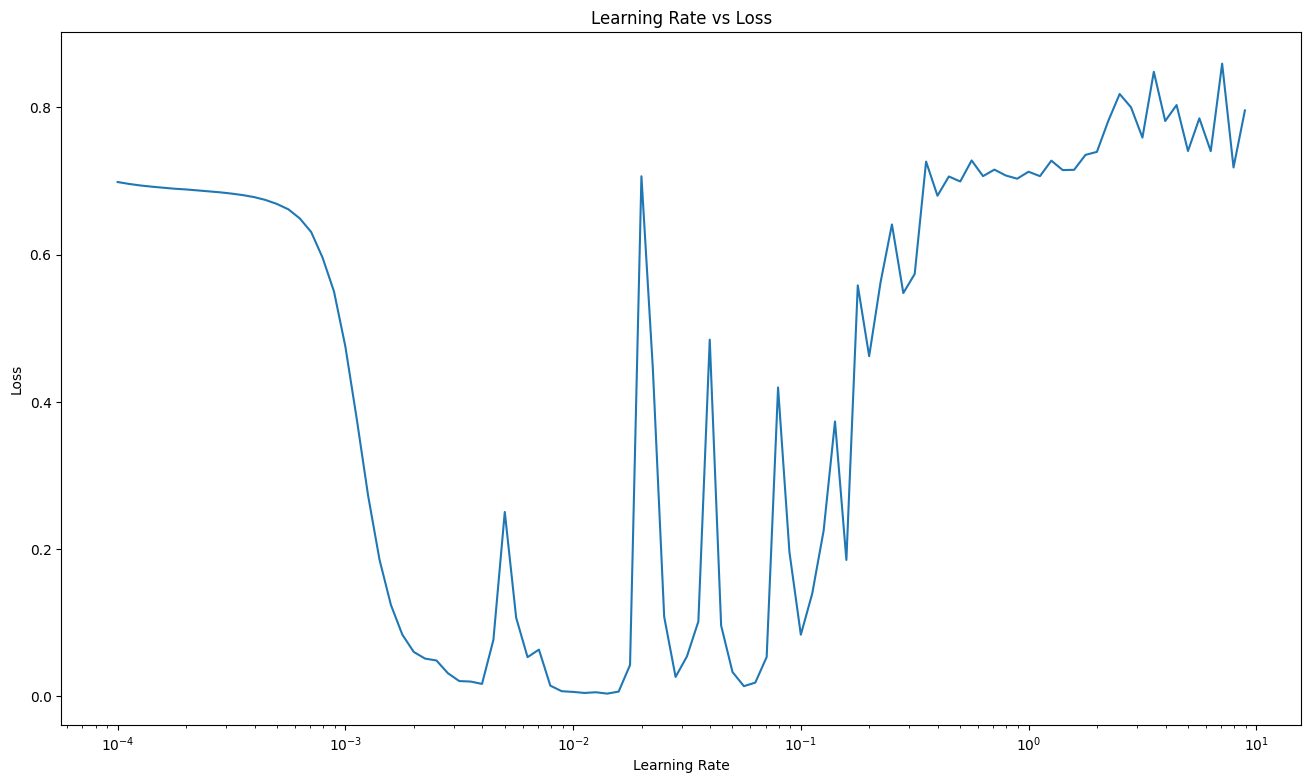

In [112]:
#plot the vissualization to show loss vs learning rate
plt.figure(figsize=(16,9))
lrs = 0.0001 * 10**(tf.range(100)/20)
plt.semilogx(lrs,pd.DataFrame(history_10.history)['loss'])
plt.title('Learning Rate vs Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

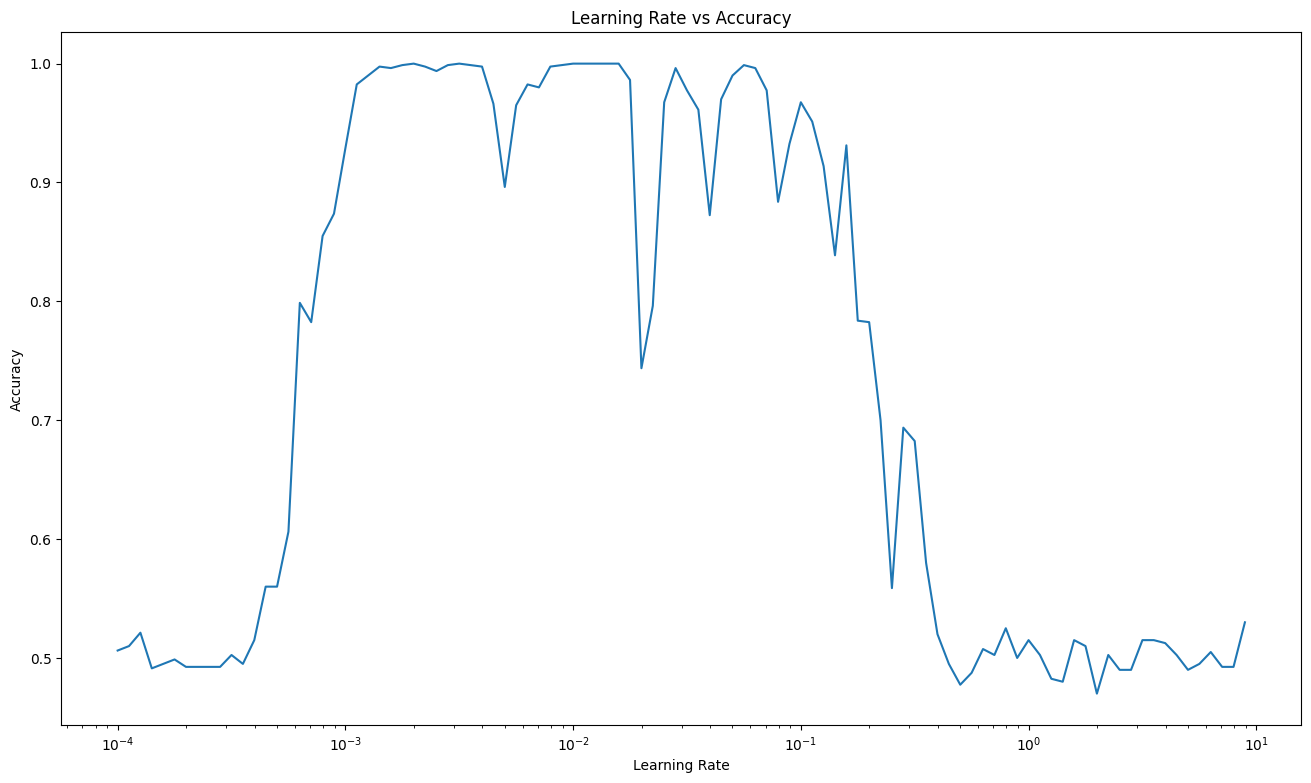

In [115]:
#plot the vissualization to show accuracy vs learning rate
plt.figure(figsize=(16,9))
lrs = 0.0001 * 10**(tf.range(100)/20)
plt.semilogx(lrs,pd.DataFrame(history_10.history)['accuracy'],nonpositive='clip')
plt.title('Learning Rate vs Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

# Working with larger example: **Multiclass Classification**
When you have more than two classes as a option, it is known as a Multiclass C;assificaion.

In [116]:
#import clothing dataset
from tensorflow.keras.datasets import fashion_mnist

In [118]:
#the data has already imported as train and test sets
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [119]:
#get the shape of our train set
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [120]:
#let's get the first example of our train data and train label
print(f"First example of train_data:\n{train_data[0]}\n")
print(f"The First example of train_label:\n{train_labels[0]}")

First example of train_data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0  

In [122]:
#check the shape of  single example of data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

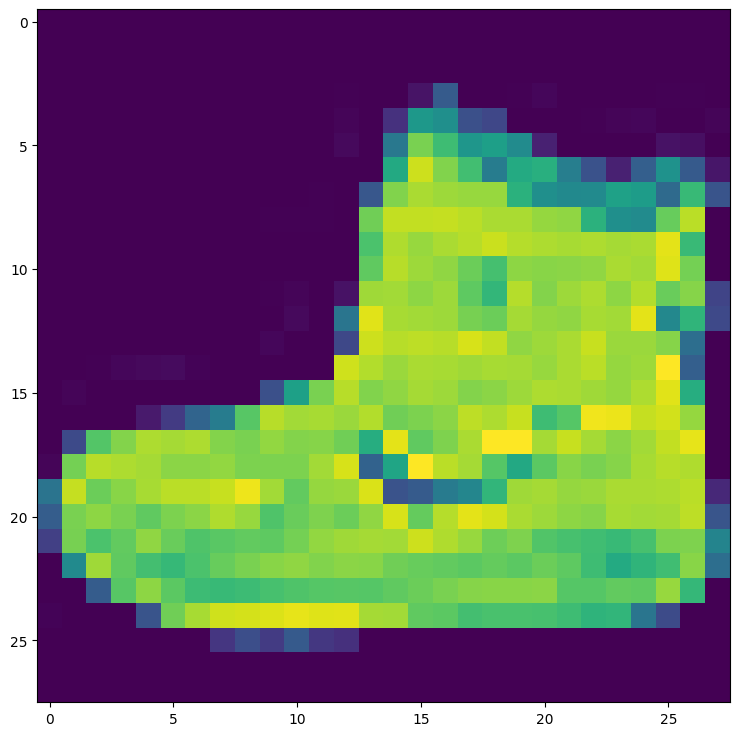

In [123]:
#plot the single example
plt.figure(figsize=(16,9))
plt.imshow(train_data[0])
plt.show()